## 3. Planetary orbits

The gravitational force felt by an object (planet, satellite, star, etc.) of mass $m_1$ at position $r_1$  due to another of mass $m_2$ at $r_2$ is given by

$$\mathbf{F} = - \frac{G m_1 m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} \mathbf{r}$$

The equations of motion for the first object can then be written:

$$ \frac{\mathrm{d}^2 x_1}{\mathrm{d} t^2} = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} x_1 $$
$$ \frac{\mathrm{d}^2 y_1}{\mathrm{d} t^2} = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} y_1 $$

In what follows, we will express time in years, distances in AU (astronomical unit $\sim$ Earth-Sun distance), masses in terms of the solar mass ($M_S$) and use $G \approx 4 \pi^2$ to simplify calculations.


Revisit the ODE notebook from Lecture 6 -- here we examined how a 2nd order differential equation (the harmonic oscillator) could be solved using scipy.integration.odeint by splitting it into two coupled first order equations.

Use this as a basis to solve the differential equations above.

### Exercise 1
For the first case, we look at the case of the earth and the sun.

Take $m_1 = 3\times10^{-6}$ and $m_2 =1.0$.

Further assume that the sun remains fixed at the origin -- i.e. $\mathbf{r_2}(t) = \mathbf{0}$.

Use initial conditions $\mathbf{r}(t=0) = (1,0)$ and $\mathbf{v}(t=0) = (0, 2\pi)$.


a) Write the system of 4 coupled differential equations describing the system.

b) Write a function evaluating each of the first derivative terms, and which can be passed to odeint to integration this system of ODEs.

c) Calculate the orbit trajectory by integrating the system of ODEs with a suitable time step.

d) Plot and compare a few orbit with different initial velocities



_answer to a)_

$$ \frac{\mathrm{d} x_1}{\mathrm{d} t} (t)= ?? $$

$$ \frac{\mathrm{d} y_1}{\mathrm{d} t} (t) = ?? $$

$$ \frac{\mathrm{d} v_{x1}}{\mathrm{d} t} (t) = ??  $$

$$ \frac{\mathrm{d} v_{y1}}{\mathrm{d} t} (t) = ?? $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#%matplotlib notebook    -- uncomment if you want to use animations (best to copy the notebook for this!)

In [2]:
# y contains (x1, y1, vx1, vy1)

def dydt(y, t, m2):
    output = np.zeros_like(y)
    output[0]= y[2]
    output[1]= y[3]
    output[2]= - 4*np.pi**2 *m2 * y[0] / (np.sqrt(y[0]**2 + y[1]**2))**3
    output[3]= - 4*np.pi**2 *m2 * y[1] / (np.sqrt(y[0]**2 + y[1]**2))**3
    return output
    
    
    return output         

In [3]:
y0 =                   
t=
earthdata = odeint(               ).T   

SyntaxError: invalid syntax (<ipython-input-3-f401132d660e>, line 1)

In [4]:
otherstarting = [ ???  ]
otherdata = []                         #create an empty list

for const in otherstarting:
    y0a = np.array((1, 0, 0*np.pi, const*np.pi)) 
    temp = odeint(         ).T
    otherdata.append(temp)

SyntaxError: invalid syntax (<ipython-input-4-95c2abf53705>, line 1)

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
ax.plot(0, 0, 'o', ms=10, color='orange')
ax.plot(earthdata[0], earthdata[1], label="Earth orbit")

for i, const in enumerate(otherstarting):
    ax.plot(     ???       , label='v_0='+str(const)+r'$\pi$')
ax.set_xlim(???)
ax.set_ylim(???)
ax.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-5-f4bf573afdea>, line 7)

### Homework Q3

Generalise the function above to allow for an arbitrary number of objects, without any assumptions about their relative masses. (Again assume they are in-plane -- only x and y components vary).

<br>

a) Create a stable binary star system, with the barycentre at the origin.

(_Hint: The distance from the centre of a star to the barycentre is given by  $r_1 = R \frac{m_2}{m_1+m_2}$, where $R$ is the separation between the two stars_)

<br>



b) Place a _much_ smaller planet in orbit around the binary system in a quasi-stable orbit (i.e. the orbit remains almost identical over approx. 10 periods)

(_Hint: choose an initial radius/velocity consistent with a stable orbit around a single large star at the barycenter_)

Create a 2-subplot figure showing i) the orbits of the entire system, and ii) a zoom showing only the binary stars.

<br>


c) Keeping the other parameters fixed, increase the mass of the planet and track the evolution of the orbits.

Show two interesting cases with plots similar to b).



<br>


Bonus exercise: Create an animation to show the time evolution of the orbits for one of the cases in c)

<br>


In [6]:
# Hint use num = number of objects
# Organise y as a 4*num element array arranged (x1, x2, ... y1, y2, .... vx1, vx2,....., vy1, vy2,....)
# organise output similarly
# mass is now a vector with num elements

#function to be called in odeint
#defined two additional functions for accounting for cases with more than one gravitating body, while still being in plane
#see nbodyaccelx and nbodyaccely
def dydt_gen(y, t, mass, num):
    output = np.zeros_like(y)
    i = 0
    while i < num:
        output[0 + i] = y[2 * num + i]
        output[num + i] = y[3 * num + i]
        output[2 * num + i] = nbodyaccelx(y, mass, i, num)
        output[3 * num + i] = nbodyaccely(y, mass, i, num)
        i+= 1
    return output
         
    ##

    
def nbodyaccelx(y, mass, i, num):
    accelx = 0
    j = 0
    while j < num:
        if j != i:
            accelx = accelx + ( ( -4 * (np.pi ** 2) * mass[j] * y[0 + i] ) / (np.sqrt(((y[0 + i]-y[0 + j])**2 + (y[num + i]-y[num + j])**2))) ** 3)
            j+= 1
        else:
            j+= 1
    return accelx

def nbodyaccely(y, mass, i, num):
    accely = 0
    j = 0
    while j < num:
        if j != i:
            accely = accely + ( (-4 * (np.pi ** 2) * mass[j] * y[num + i] ) / (np.sqrt(((y[0 + i]-y[0 + j])**2 + (y[num + i]-y[num + j])**2))) ** 3)
            j += 1
        else:
            j += 1
    return accely

In [7]:
# Binary stars only 
#With the setup of equal masses = 1.0, const >= 0.5 causes results in no orbit
num=2
masses=[1.0, 1.0]
const = 0.25
x0s=[0, 0]
y0s=[1.0, -1.0]
vx0=[const * 2 * np.pi, const * -2 * np.pi]
vy0=[0, 0]

input0 = np.concatenate((x0s, y0s, vx0, vy0))

t=np.linspace(0,100, 1000)
testi = 0
#print(nbodyaccelx(input0, masses, testi, num));print(nbodyaccely(input0, masses, testi, num));
#print(dydt_gen(input0, t, masses, num))

bin_data = odeint(dydt_gen, input0, t, args=(masses, num)).T
#print(bin_data)

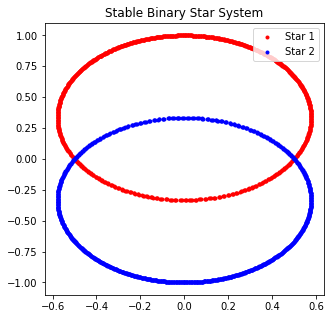

In [8]:
fig, ax =plt.subplots(1, 1, figsize = (5,5))
ax.plot(bin_data[0], bin_data[2], 'r.', label = 'Star 1')
ax.plot(bin_data[1], bin_data[3], 'b.', label = 'Star 2')
ax.legend(loc = 1)
ax.set_title('Stable Binary Star System')
fig.patch.set_facecolor('white')

In [ ]:
fig, ax = ?

In [19]:
# Binary stars and planet
num2=3
pl_mass=1.25    #mass of planet
masses2=[1.0, 1.0, pl_mass]

pl_dist=6.0         #starting distance of planet from barycentre of stars
x0s2=[-1.0, 1.0, pl_dist]
y0s2=[0.0, 0.0, 0.0]
const2 = 0.55
v_init = const2 * 2 * np.pi
vx02=[0, 0, 0]
vy02=[const * 2 * np.pi, const * -2 * np.pi, v_init]

input02 = np.concatenate((x0s2, y0s2, vx02, vy02))

t_tot, t_steps = 200, 1000

t2=np.linspace(0,t_tot, t_steps)
binp_data = odeint(dydt_gen, input02, t2, args=(masses2, num2)).T 


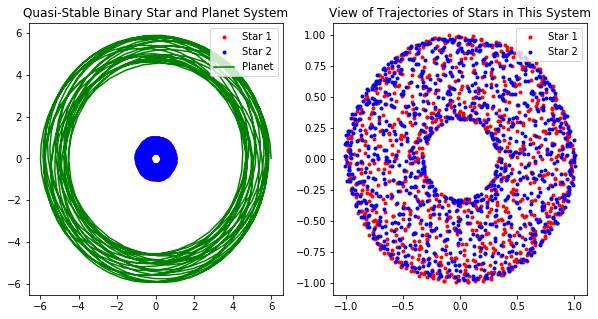

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(binp_data[0], binp_data[3], 'r.', label = 'Star 1')
ax[0].plot(binp_data[1], binp_data[4], 'b.', label = 'Star 2')
ax[0].plot(binp_data[2], binp_data[5], 'g', label = 'Planet')
ax[0].legend(loc = 1)
ax[0].set_title('Quasi-Stable Binary Star and Planet System')
ax[1].plot(binp_data[0], binp_data[3], 'r.', label = 'Star 1')
ax[1].plot(binp_data[1], binp_data[4], 'b.', label = 'Star 2')
ax[1].legend(loc = 1)
ax[1].set_title('View of Trajectories of Stars in This System')
fig.patch.set_facecolor('white')



